## Solving System of ODEs

Equations of type:-<br>
$$\begin{bmatrix} \dot{x_1}\\ \dot{x_2}\\ \dot{x_3}\\ . \\ .\\ .\\\dot{x_n} \end{bmatrix} = \begin{bmatrix} f_1(x_1, x_2,..x_n, t)\\ f_2(x_1, x_2,..x_n, t)\\ f_3(x_1, x_2,..x_n, t)\\ . \\ .\\ .\\f_n(x_1, x_2,..x_n, t) \end{bmatrix}$$ <br>
where $$ x = (x_1, x_2,...,x_n)$$ $$f(x,t) = (f_1, f_2,...,f_n)$$<br>
and the initial condition, $x(0)$ is given by:-
$$x(0) = (x_1(0), x_2(0),...,x_n(0)$$

 we will use the forward euler scheme to find the solution to the above ODE,i.e,
 
 **$$u_{k+1} = u_k + \Delta{t}\space f(u_k, t_k)$$**

In [21]:
import numpy as np
from matplotlib import pyplot as plt

Let's solve the ODE 
$$\ddot{u} + u = 0$$
This can be converted to system with first order ODE
$u = u_1$, then $\dot{u} = \dot{u_1} = u_2$ and $\ddot{u} = \dot{u_2} = -u = -u_1$ (from the ODE), then

$$\begin{bmatrix} \dot{u_1} \\ \dot{u_2}\end{bmatrix} = \begin{bmatrix} 0 & 1\\ -1 & 0\end{bmatrix} \begin{bmatrix} u_1 \\ u_2\end{bmatrix}$$

In [22]:
#checking the stability of system
A = np.array([[0, 1],[-1, 0]])
eig, V = np.linalg.eig(A)
print(eig)

[0.+1.j 0.-1.j]


In [64]:
def forward_euler(F, u0, T, n):
    #F = lambda u,t:np.asarray(f(u,t))
    step = T/n
    t = np.zeros(n+1)
    if isinstance(u0, (int, float)):   #to check if the initial condition is an integer or float
        u = np.zeros(n+1)
    else:
        neq = len(u0)                  #no. of equations
        u = np.zeros((n+1, neq))    
    u[0,:] = u0                        # all rows are the points and columns are the equations
    t[0] = 0
    
    for i in range(n):
        t[i+1] = t[i] + step
        u[i+1,:] = u[i,:] + F(u[i,:],t[i])*step
        
    return u, t

In [65]:
# defining the function
func = lambda u,t: np.array([u[1], -u[0]])

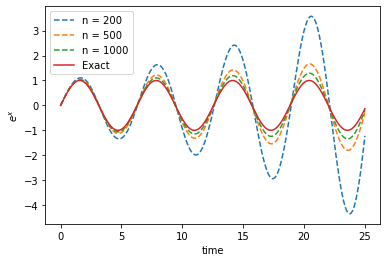

In [68]:
u0 = [0, 1]
for i in [200, 500, 1000]:
    u, t = forward_euler(func, u0, 25, n =i)
    plt.plot(t, u[:,0], linestyle = "dashed", label = f"n = {i}")

#Plotting the exact curve
plt.plot(t, np.sin(t), label = "Exact")
plt.legend()
plt.xlabel("time")
plt.ylabel("$e^x$")
plt.show()

Text(0.5, 1.0, 'Phase plot')

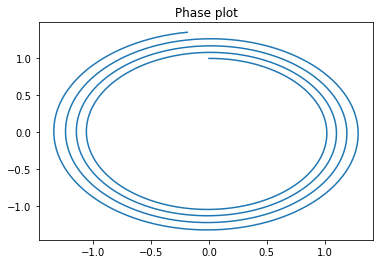

In [67]:
plt.plot(u[:,0], u[:,1])
plt.title("Phase plot")

In [40]:
func(u0, 2)

(1, 0)

In [57]:
print(func)

<function func at 0x7f44228c2940>
